In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# !unzip -q '/content/dataset.zip'  && echo "Unzip completed"

In [ ]:
dataset_path = '/content/dataset'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    channel_shift_range=10.0,
    fill_mode='nearest'
)

# Validation
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)
print("Your animal classes:", class_names)

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.
Your animal classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(15, activation='softmax')(x)  # Change to num_classes if dynamic

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 698ms/step - accuracy: 0.1206 - loss: 2.9859 - val_accuracy: 0.5979 - val_loss: 1.8421
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 459ms/step - accuracy: 0.4499 - loss: 1.8935 - val_accuracy: 0.7467 - val_loss: 1.2431
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 448ms/step - accuracy: 0.6579 - loss: 1.3105 - val_accuracy: 0.8303 - val_loss: 0.9098
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - accuracy: 0.7285 - loss: 1.0145 - val_accuracy: 0.8381 - val_loss: 0.7449
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 454ms/step - accuracy: 0.7740 - loss: 0.8107 - val_accuracy: 0.8512 - val_loss: 0.6498
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 454ms/step - accuracy: 0.7882 - loss: 0.7826 - val_accuracy: 0.8590 - val_loss: 0.5864
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 436ms/step - accuracy: 0.7968 - loss: 0.7024 - val_accuracy: 0.8642 - val_loss: 0.5492
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 452ms/step - accuracy: 0.8275 - loss: 0.5759 - val_accu

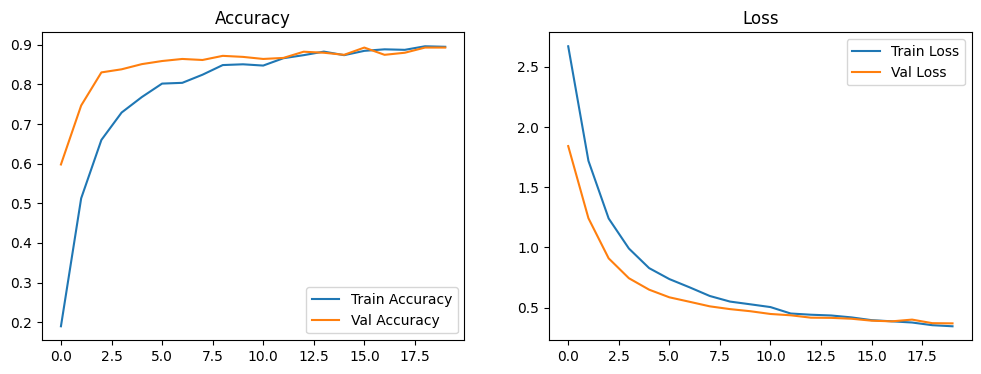

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [11]:
model.save('model.h5')